In [0]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import keras.preprocessing.text
from keras.preprocessing import text
from keras.preprocessing import sequence
from keras.layers.core import Dense, Activation

import re
import csv
from string import punctuation
import nltk 
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
import pandas as pd
                                                 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:

DF= pd.read_json("/data_task2/train_filled.json", lines=True)
print (DF.head())
news= DF["sentence"].tolist()
labels = DF["label"].tolist()
ids= DF["id"].tolist()
#print (ids)
print(news[0:6])
ids_protest= DF.loc[DF['label'] == 1, 'id']



DF1= pd.read_json("/data_task2/test_filled.json", lines=True)
print (DF1.head())
news_test= DF1["sentence"].tolist()
#labels_test = DF1["label"].tolist()
#print (len(ids_test))
print(news_test[0:6])



DF2= pd.read_json("/data_task2/test_china_filled.json", lines=True)
print (DF2.head())
news_test_china= DF2["sentence"].tolist()
#labels_test_china = DF2["label"].tolist()
#ids_test_china= DF2["id"].tolist()
#print (len(ids_test_china))
print(news_test_china[0:6])



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
       id  ...                                                url
0  100001  ...  http://www.newindianexpress.com/states/andhra-...
1  100002  ...  http://www.newindianexpress.com/states/andhra-...
2  100003  ...  http://www.newindianexpress.com/states/andhra-...
3  100004  ...  http://www.newindianexpress.com/states/andhra-...
4  100005  ...  http://www.newindianexpress.com/states/andhra-...

[5 rows x 6 columns]
['Anantapur Lawyers to Revive Samaikya Agitati

In [0]:
# load elmo_train_new
pickle_in = open("/data_task2/elmo_train_03032019.pickle", "rb")
elmo_train= pickle.load(pickle_in)

# load elmo_train_new
pickle_in = open("/data_task2/elmo_test_03032019.pickle", "rb")
elmo_test= pickle.load(pickle_in)

# load elmo_train_new china
pickle_in = open("/data_task2/elmo_test_china_03032019.pickle", "rb")
elmo_test_china= pickle.load(pickle_in)


print (len(elmo_train))
print (len(elmo_test))
print (len(elmo_test_china))


5885
1107
1235


Logistic regression

In [0]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(elmo_train, 
                                                  labels,  
                                                  random_state=42, 
 
                                                  
                                                  test_size=0.3)

print(xtrain)
lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)
preds_valid = lreg.predict(xvalid)
print(f1_score(yvalid, preds_valid))

[[-2.33658180e-02 -3.49996798e-02  3.24002765e-02 ... -6.96145520e-02
   7.05032796e-03 -1.53537067e-02]
 [-2.00910941e-02 -6.01675455e-03  5.42185335e-05 ...  1.08649898e-02
  -8.83280858e-03 -4.18234579e-02]
 [ 1.94312800e-02 -1.08226538e-02 -1.78339463e-02 ...  1.86965931e-02
  -2.64068898e-02 -2.76320963e-03]
 ...
 [-2.85088532e-02 -5.34144640e-02  3.61102857e-02 ...  2.39265896e-02
  -1.26463575e-02 -2.74604987e-02]
 [-1.76236376e-01 -1.03437491e-01  3.12474426e-02 ... -1.62472293e-01
  -6.62233308e-03  4.13568094e-02]
 [ 1.18468497e-02 -6.04713000e-02  6.20176550e-03 ... -2.77695172e-02
   3.08569334e-02 -3.53750549e-02]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5165562913907285


In [0]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(labels), labels)
print(class_weights)

[0.60087809 2.97823887]


In [0]:
from sklearn.utils.class_weight import compute_class_weight
print (np.unique(labels))
class_weightt = compute_class_weight('balanced', np.unique(labels), labels)
print(class_weightt)

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(labels), labels)
print(class_weights)


[0 1]
[0.60087809 2.97823887]
[0.60087809 2.97823887]


Bidirectionnal LSTM RNN -MODEL 4

In [0]:
import keras.backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall)) 


1766/1766 [==============================] - 2s 1ms/step
Test Score: 0.3269585501001821
Test Accuracy: 0.5765772141254637


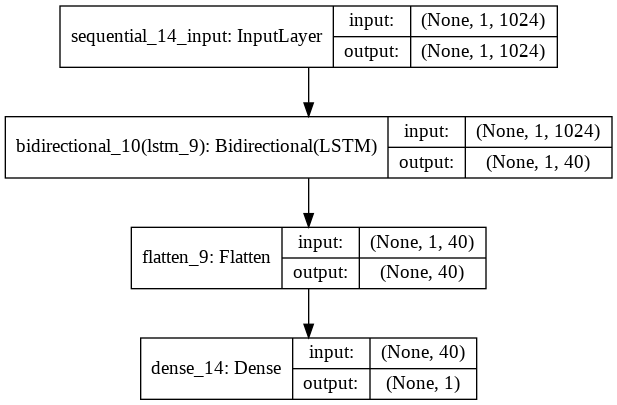

In [0]:
from keras.layers import Bidirectional, GlobalMaxPool1D,TimeDistributed, Flatten
import tensorflow.keras.backend as K
X = xtrain.reshape((xtrain.shape[0], 1,xtrain.shape[1]))
Y= xvalid .reshape((xvalid.shape[0], 1,xvalid.shape[1]))
model4 = Sequential()
model4.add(Bidirectional(LSTM(20,return_sequences=True ,input_shape=(1,1024) )))
model4.add(Flatten())
model4.add((Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))))
model4.compile(optimizer="adam", loss="binary_crossentropy", 
     metrics=[ f1_metric])
#model.summary()

model4.fit(X,np.asarray(ytrain), epochs=20, verbose=False,class_weight=class_weights)
score = model4.evaluate(Y, np.asarray(yvalid), verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])
from keras.utils import plot_model
plot_model(model4, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)


In [0]:
import itertools 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
seed = 7
numpy.random.seed(seed)
X_test=elmo_test.reshape(elmo_test.shape[0], 1,elmo_test.shape[1])
X =elmo_train.reshape(elmo_train.shape[0], 1,elmo_train.shape[1])
Y =np.asarray(labels)

kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
cvscores = []
print (type(Y))
for train, test in kfold.split(X,Y):
  
  
  model4 = Sequential()
  model4.add(Bidirectional(LSTM(20,return_sequences=True ,input_shape=(1,1024) )))
  model4.add(Flatten())
  model4.add((Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))))
  model4.compile(optimizer="adam", loss="binary_crossentropy", 
     metrics=['accuracy'])
  # Fit the model
  
  
  model4.fit(X[train], Y[train],  epochs=20, verbose=False)
  # evaluate the model
  scores = model4.evaluate(X[test], Y[test], verbose=1)
  print("%s: %.2f%%" % (model4.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  prob4= model4.predict_classes(X_test)
print(prob4)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

<class 'numpy.ndarray'>


NameError: ignored

In [0]:
import itertools
labels_test=prob4
print (labels_test)
s=0
for i in labels_test:
  if i ==1:
    s=s+1
print(s)    


[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
120


In [0]:
import itertools
labels_test=list(itertools.chain.from_iterable(model4.predict_classes (elmo_test.reshape((elmo_test.shape[0], 1,elmo_test.shape[1])))))
print (labels_test)
s=0
for i in labels_test:
  if i ==1:
    s=s+1
print(s)    

import itertools
labels_test_china=list(itertools.chain.from_iterable(model4.predict_classes (elmo_test_china.reshape((elmo_test_china.shape[0], 1,elmo_test_china.shape[1])))))
print (labels_test_china)
s=0
for i in labels_test_china:
  if i ==1:
    s=s+1
print(s)    

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

Multi Channel CNN - MODEL 6

(4119, 1, 1024)
1766/1766 [==============================] - 2s 1ms/step
Test Score: 0.4857721606170335
Test Accuracy: 0.5722869104059204


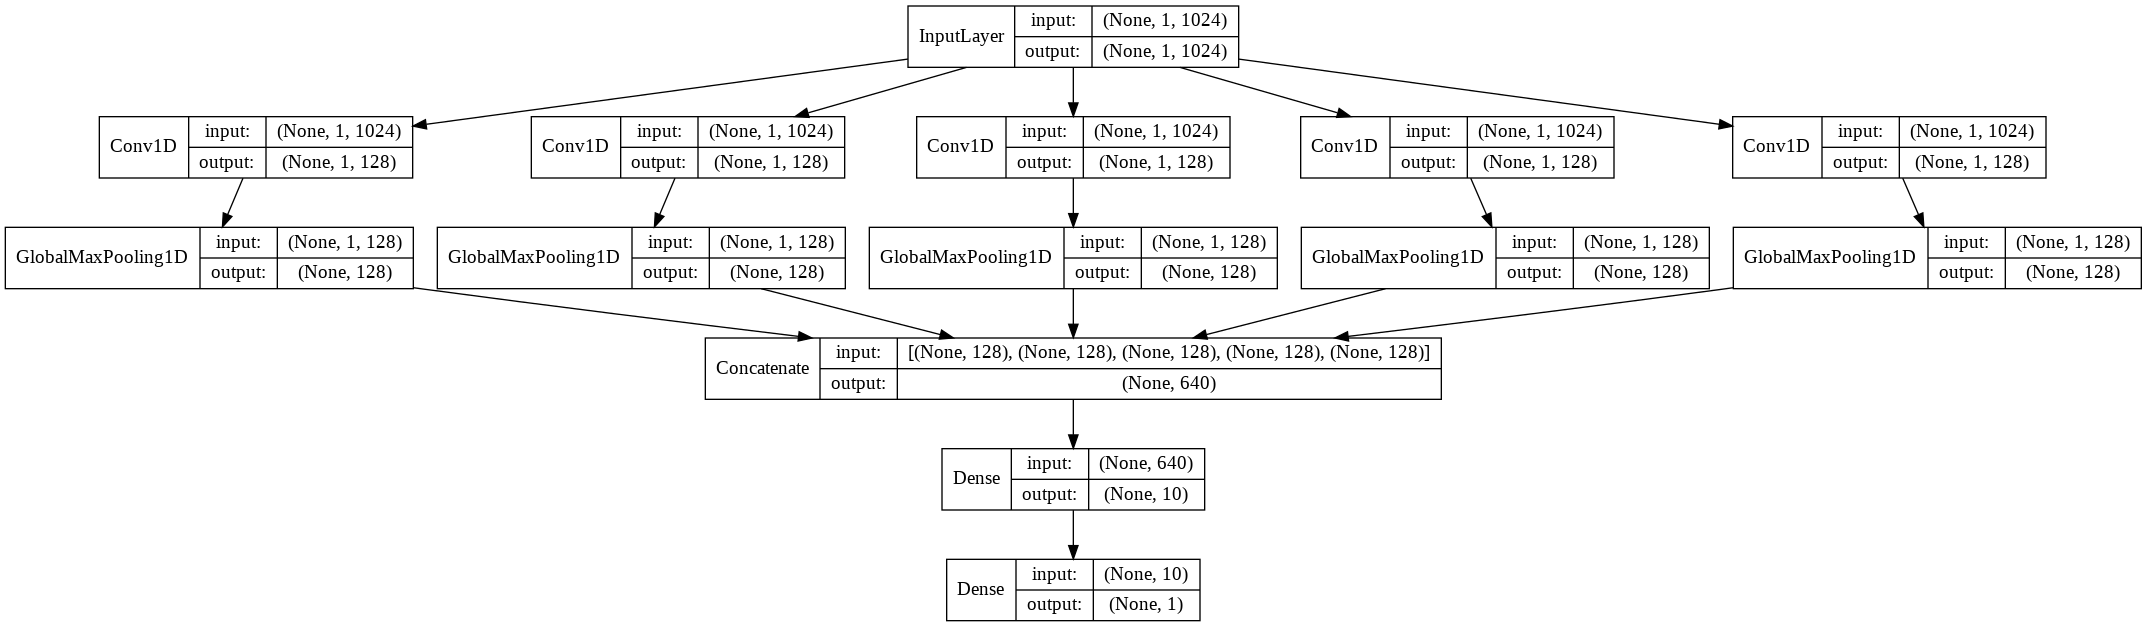

<Figure size 72x72 with 0 Axes>

In [0]:
import keras
from keras.models import Model
from keras.layers import Input
import tensorflow as tf
import tensorflow.keras.backend as K

from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, GlobalMaxPooling1D,concatenate
from keras.models import Sequential
model6 = Sequential()

X = xtrain.reshape((xtrain.shape[0], 1,xtrain.shape[1]))
Y= xvalid .reshape((xvalid.shape[0],1, xvalid.shape[1]))
print (X.shape)

model6 = Sequential()
input4 = Input(X.shape[1:])
#inputs = Input(X_train.shape[1:])
#channel 1
l1=Conv1D(128, 1, activation='relu' ,padding='same') (input4)
flat1= GlobalMaxPooling1D()(l1)
#channel 2
l2=Conv1D(128, 2, activation='relu' ,padding='same') (input4)
flat2= GlobalMaxPooling1D()(l2)
#channel 3
l3=Conv1D(128, 3, activation='relu' ,padding='same') (input4)
flat3= GlobalMaxPooling1D()(l3)
#channel 4
l4=Conv1D(128, 4, activation='relu' ,padding='same') (input4)
flat4= GlobalMaxPooling1D()(l4)
#channel 5
l5=Conv1D(128, 5, activation='relu' ,padding='same') (input4)
flat5= GlobalMaxPooling1D()(l5)

merged = concatenate([flat1, flat2, flat3,flat4,flat5])
dense1=(Dense(10, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))) (merged)
output=Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))(dense1)
model6 = Model(inputs=input4, outputs=output)
model6.compile(optimizer="adam", loss="binary_crossentropy", 
     metrics=[ f1_metric])

model6.fit(X,np.asarray(ytrain), epochs=20, verbose=False,class_weight=class_weights)
score = model6.evaluate(Y, np.asarray(yvalid), verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
from keras.utils import plot_model
from matplotlib import pyplot as plt
plt.figure(figsize=(1,1))
plot_model(model6, to_file='model_plot2.png', show_shapes=True, show_layer_names=False)

In [0]:
import itertools
labels_test= list(  itertools.chain.from_iterable(  ( model6.predict(elmo_test.reshape(elmo_test.shape[0], 1,elmo_test.shape[1])) > 0.5).astype(np.int)))
print (labels_test)
s=0
for i in labels_test:
  if i ==1:
    s=s+1
print(s)    

import itertools
labels_test_china=list(  itertools.chain.from_iterable(  ( model6.predict(elmo_test_china.reshape(elmo_test_china.shape[0], 1,elmo_test_china.shape[1])) > 0.5).astype(np.int)))
print (labels_test_china)
s=0
for i in labels_test_china:
  if i ==1:
    s=s+1
print(s)    

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
import itertools 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
seed = 7
numpy.random.seed(seed)
X_test=elmo_test.reshape(elmo_test.shape[0], 1,elmo_test.shape[1])
X =elmo_train.reshape(elmo_train.shape[0], 1,elmo_train.shape[1])
Y =np.asarray(labels)


kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)
cvscores = []
print (type(Y))
for train, test in kfold.split(X,Y):
  
  
  
  input4 = Input(X.shape[1:])
  #inputs = Input(X_train.shape[1:])
  #channel 1
  l1=Conv1D(128, 1, activation='relu' ,padding='same') (input4)
  flat1= GlobalMaxPooling1D()(l1)
  #channel 2
  l2=Conv1D(128, 2, activation='relu' ,padding='same') (input4)
  flat2= GlobalMaxPooling1D()(l2)
  #channel 3
  l3=Conv1D(128, 3, activation='relu' ,padding='same') (input4)
  flat3= GlobalMaxPooling1D()(l3)
  #channel 4
  l4=Conv1D(128, 4, activation='relu' ,padding='same') (input4)
  flat4= GlobalMaxPooling1D()(l4)
  #channel 5
  l5=Conv1D(128, 5, activation='relu' ,padding='same') (input4)
  flat5= GlobalMaxPooling1D()(l5)

  merged = concatenate([flat1, flat2, flat3,flat4,flat5])
  dense1=(Dense(10, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001))) (merged)
  output=Dense(1, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(0.001))(dense1)
  model6 = Model(inputs=input4, outputs=output)
  model6.compile(optimizer="adam", loss="binary_crossentropy", 
       metrics=['accuracy'])
  # Fit the model
  model6.fit(X[train], Y[train],  epochs=20, verbose=False)
  # evaluate the model
  scores = model6.evaluate(X[test], Y[test], verbose=1)
  print("%s: %.2f%%" % (model6.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  prob6=model6.predict(X_test)
  

print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

<class 'numpy.ndarray'>
1472/1472 [==============================] - 2s 1ms/step
acc: 86.01%
1471/1471 [==============================] - 2s 1ms/step
acc: 87.29%
1471/1471 [==============================] - 2s 1ms/step
acc: 85.59%
1471/1471 [==============================] - 2s 1ms/step
acc: 85.93%
86.20% (+/- 0.65%)


In [0]:
import itertools
import itertools
labels_test6=   (prob6 > 0.5).astype(np.int)
print (labels_test6)
s=0
for i in labels_test:
  if i ==1:
    s=s+1
print(s)


import itertools
labels_test_china6=list(  itertools.chain.from_iterable(  ( model6.predict(elmo_test_china.reshape(elmo_test_china.shape[0], 1,elmo_test_china.shape[1])) > 0.5).astype(np.int)))
print (labels_test_china6)
s=0
for i in labels_test_china:
  if i ==1:
    s=s+1
print(s)    

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
160
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

Bi-GRU -Multi channel Model 8

(4119, 1, 1024)
1766/1766 [==============================] - 3s 1ms/step
Test Score: 0.5022754956048409
Test Accuracy: 0.49752824249786


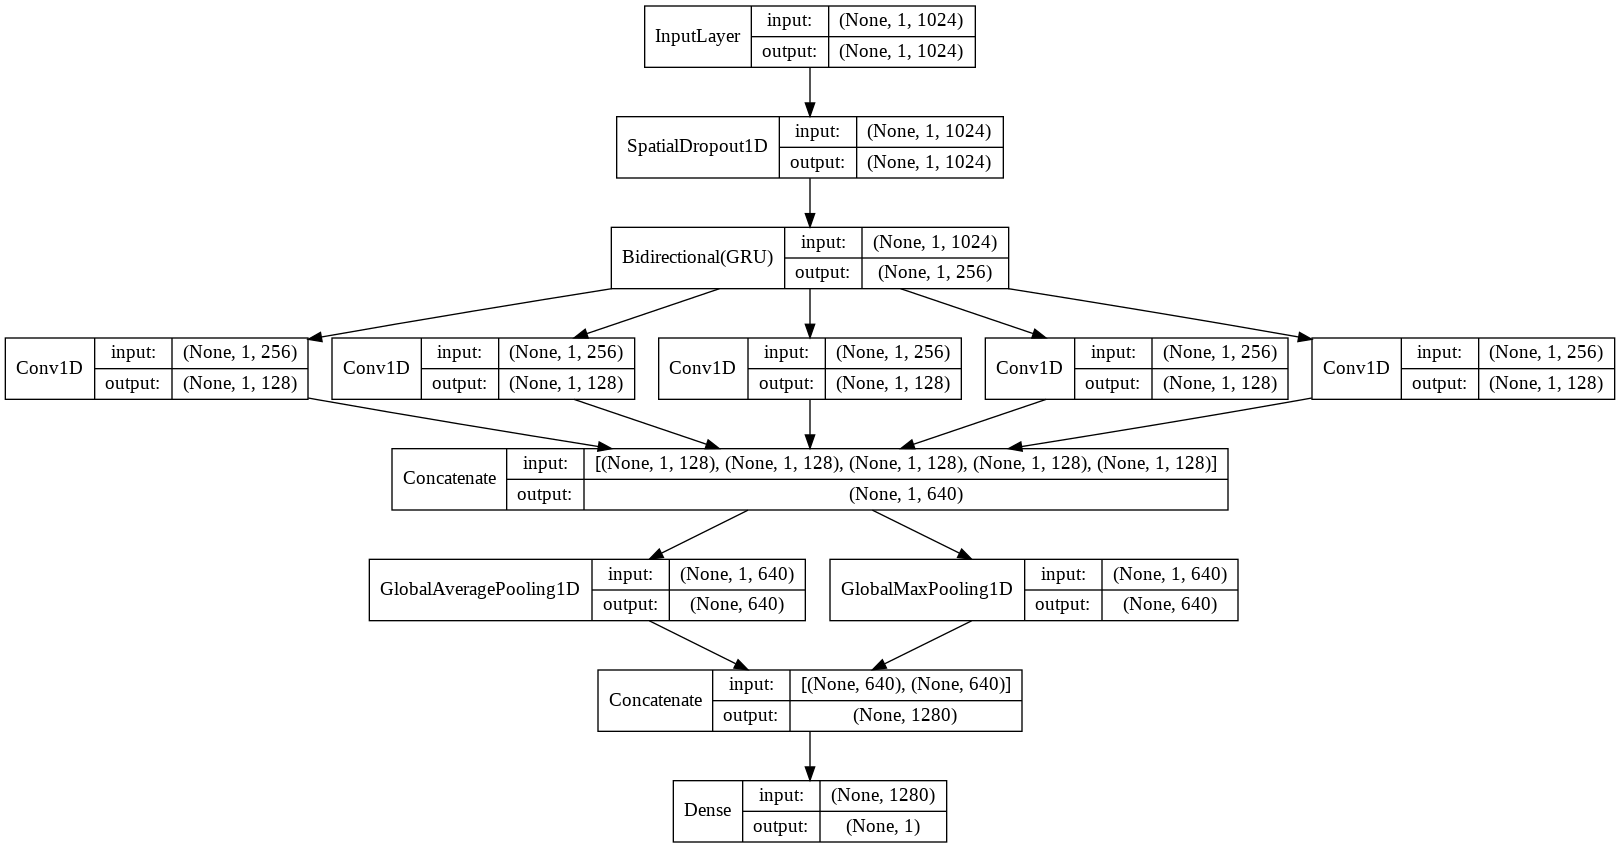

In [0]:
from keras.models import Model
from keras.layers import Input
import tensorflow as tf
import tensorflow.keras.backend as K
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, GlobalMaxPooling1D,concatenate, SpatialDropout1D ,GRU, GlobalAveragePooling1D
from keras.models import Sequential


X = xtrain.reshape((xtrain.shape[0], 1,xtrain.shape[1]))
Y= xvalid .reshape((xvalid.shape[0],1, xvalid.shape[1]))
print (X.shape)

model7 = Sequential()
inp= Input(X.shape[1:])
x = SpatialDropout1D(0.2)(inp)
x = Bidirectional(GRU(128, return_sequences = True))(x)

#channel 1
l1=Conv1D(128, 1, activation='relu' ,padding='same') (x)
#channel 2
l2=Conv1D(128, 2, activation='relu' ,padding='same') (x)
#channel 3
l3=Conv1D(128, 3, activation='relu' ,padding='same') (x)
#channel 4
l4=Conv1D(128, 4, activation='relu' ,padding='same') (x)
#channel 5
l5=Conv1D(128, 5, activation='relu' ,padding='same') (x)

merged = concatenate([l1, l2, l3,l4,l5])
avg_pool = GlobalAveragePooling1D()(merged)
max_pool = GlobalMaxPooling1D()(merged)
x = concatenate([avg_pool, max_pool])
x = Dense(1, activation = "sigmoid",kernel_regularizer=keras.regularizers.l2(0.001))(x)

model8 = Model(inputs=inp, outputs=x)
model8.compile(optimizer="adam", loss="binary_crossentropy", 
     metrics=[ f1_metric])

model8.fit(X,np.asarray(ytrain), epochs=20, verbose=False,class_weight=class_weights)
score = model8.evaluate(Y, np.asarray(yvalid), verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
from keras.utils import plot_model
plot_model(model8, to_file='model_plot2.png', show_shapes=True, show_layer_names=False)

In [0]:
import itertools
labels_test8= list(  itertools.chain.from_iterable(  ( model8.predict(elmo_test.reshape(elmo_test.shape[0], 1,elmo_test.shape[1])) > 0.5).astype(np.int)))
print (labels_test)
s=0
for i in labels_test8:
  if i ==1:
    s=s+1
print(s)    

import itertools
labels_test_china8=list(  itertools.chain.from_iterable(  ( model8.predict(elmo_test_china.reshape(elmo_test_china.shape[0], 1,elmo_test_china.shape[1])) > 0.5).astype(np.int)))
print (labels_test_china)
s=0
for i in labels_test_china8:
  if i ==1:
    s=s+1
print(s) 

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
import itertools 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold


seed = 7
numpy.random.seed(seed)
X_test=elmo_test.reshape(elmo_test.shape[0], 1,elmo_test.shape[1])
X =elmo_train.reshape(elmo_train.shape[0], 1,elmo_train.shape[1])
Y =np.asarray(labels)


kfold = StratifiedKFold(n_splits=4, shuffle=True)
cvscores = []
print (type(Y))
for train, test in kfold.split(X,Y):
  inp= Input(X.shape[1:])
  x = SpatialDropout1D(0.2)(inp)
  x = Bidirectional(GRU(128, return_sequences = True))(x)
  

  #channel 1
  l1=Conv1D(128, 1, activation='relu' ,padding='same') (x)
  #channel 2
  l2=Conv1D(128, 2, activation='relu' ,padding='same') (x)
  #channel 3
  l3=Conv1D(128, 3, activation='relu' ,padding='same') (x)
  #channel 4
  l4=Conv1D(128, 4, activation='relu' ,padding='same') (x)
  #channel 5
  l5=Conv1D(128, 5, activation='relu' ,padding='same') (x)

  merged = concatenate([l1, l2, l3,l4,l5])
  avg_pool = GlobalAveragePooling1D()(merged)
  max_pool = GlobalMaxPooling1D()(merged)
  x = concatenate([avg_pool, max_pool])
  x = Dense(1, activation = "sigmoid",kernel_regularizer=keras.regularizers.l2(0.001))(x)

  model8 = Model(inputs=inp, outputs=x)
  model8.compile(optimizer="adam", loss="binary_crossentropy", 
       metrics=['accuracy'])


  # Fit the model
  model8.fit(X[train], Y[train],  epochs=20, verbose=False)
  # evaluate the model
  scores = model8.evaluate(X[test], Y[test], verbose=1)
  print("%s: %.2f%%" % (model8.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
  prob8= model8.predict(X_test)
 
#print(classes7)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))


<class 'numpy.ndarray'>
1472/1472 [==============================] - 6s 4ms/step
acc: 86.62%
1471/1471 [==============================] - 6s 4ms/step
acc: 87.56%
1471/1471 [==============================] - 6s 4ms/step
acc: 86.13%
1471/1471 [==============================] - 6s 4ms/step
acc: 87.36%
86.92% (+/- 0.57%)


In [0]:
import itertools

labels_test= list(  itertools.chain.from_iterable(  (prob8 > 0.5).astype(np.int)))
print (labels_test)
s=0
for i in labels_test:
  if i ==1:
    s=s+1
print(s)    


import itertools
labels_test_china=list(  itertools.chain.from_iterable(  ( model8.predict(elmo_test_china.reshape(elmo_test_china.shape[0], 1,elmo_test_china.shape[1])) > 0.5).astype(np.int)))
print (labels_test_china)
s=0
for i in labels_test_china:
  if i ==1:
    s=s+1
print(s)    

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 